# **MLPP24 // Assignment 2**

assigned : **Feb 16, 2024**

DUE : **Feb 22, 2024 11:59pm**

## **Sea level rise: projections for the future**

<img src="https://cdn.viewing.nyc/assets/media/5c0dcd07e43c85f0ad421ed09f21df33/elements/08ebcd75071c8e4d673147698fbbdcdd/xl/cce6b621-11a3-4f0d-8a53-fccdb6457875_2x.png" width=500>

---

### OVERVIEW

Sea level has been on the rise for at least 100 years, and as the climate changes and the Earth warms, the rate of that rise has been an active area of study given the potential consequences if sea level is strongly affected. There are three main goals of this assignment:

1. you will apply linear regression models to satellite data using Stochastic Gradient Descent;
2. you will evaluate the goodness-of-fit of these models;
3. you will compare linear models using data covering different time scales and make projections for future sea levels.

<b>

<b>

How to complete and submit assignments:

1. Please make a copy of this notebook in your Google Drive and add your name to the filename.

2. Once you have completed the notebook, please share it with me before the due date and time by clicking the "Share" button in the upper right corner of the notebook.


Rules for assignments:

1. You may work with other students in the class, but if you do, each student with whom you worked <u>must</u> be listed below.  Direct copying from someone else's notebook is not permitted.

2. You may use generative AI models (e.g., ChatGPT) to help complete the assignment but if you do you must answer YES to the question below and bear in mind that such models <u>often</u> yield incorrect and biased solutions.

3. All solutions and outputs must be derived with python and the notebook should be "runable" by me (top to bottom) without errors.

4. Late assignments will assess a 15% late penalty up to 3 days after the due date and a 50% late penalty until the end of the term.

</b>

<u>**Instructions for tasks that will be graded are in bold below.**</u>

---

**Please list the names of the other students with whom you worked for this assignment (if none, put "None").**

None

**Did you use a generative AI model (e.g., ChatGPT) to create text or code for this assignment?**

YES

---

### **PART 1 - Background**

Good data science and machine learning (and data analysis more generally) depends on a clear understanding of the underlying problem/situation, the methods by which the data you are about to analyze are collected, and the situational context in which that data sits.  To that end:

<b>Identify three online resources that 1.) describe how sea level has been measured historically, 2.) discuss variability in sea level measurements across the globe, and 3.) provide projections and implications for the future.  Give links to these references below.</b>

1. NOAA https://tidesandcurrents.noaa.gov/sltrends/
2. NASA https://climate.nasa.gov/vital-signs/sea-level/
3. IPCC https://www.ipcc.ch/srocc/

### **PART 2 - Loading the data**

In this assignment, we will be using several different data sets from the National Oceanic and Atmospheric Administration (NOAA).  In particular, we'll be looking at data from TOPEX as well as its follow on missions Jason-1, Jason-2, and Jason-3.  All of the data that you will be using is available [here](https://www.star.nesdis.noaa.gov/sod/lsa/SeaLevelRise/LSA_SLR_timeseries.php).



<b>At the website in the previous cell, copy the link address of the global mean sea level csv file with seasonal signals removed.  Load the data from the above URL directly (i.e., do not download the data and then reupload to Google Drive) using pandas `read_csv()` function into a DataFrame named `noaa`.  Note, you'll have to skip the first 5 rows.</b>

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [85]:
fname = "https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/slr/slr_sla_gbl_free_txj1j2_90.csv"

# read the data from that file, skipping the first 5 rows of the file
noaa = pd.read_csv(fname, skiprows=5)

<b>Print the head of the DataFrame to get a sense of the contents using the DataFrame's `.head()` method.</b>

In [86]:
print(noaa.head())

        year  TOPEX/Poseidon  Jason-1  Jason-2  Jason-3
0  1992.9614          -19.24      NaN      NaN      NaN
1  1992.9865          -19.65      NaN      NaN      NaN
2  1993.0123          -15.32      NaN      NaN      NaN
3  1993.0407          -19.12      NaN      NaN      NaN
4  1993.0660          -23.64      NaN      NaN      NaN


### **PART 3 - Aggregating and plotting the data**

Notice that there are many NaN values (for a variety of reasons, but one big one is that the satellites were not all operating simultaneously).  Let's aggregate the data from all of the satellites so that we have one height for each timestamp.

<b>Take the maximum value across the four satellite columns and store it as another column within the DataFrame called `"max_level"`.</b>

In [87]:
# Maimum value of the measurements for each time
cols = ["TOPEX/Poseidon", "Jason-1", "Jason-2", "Jason-3"]
max_level = noaa[cols].max(axis=1)

# Add to the DataFrame
noaa["max_level"] = max_level

<b>Plot this maximum sea level as a function of year using a black line of linewidth 0.5.$^{\dagger}$  Remember to ALWAYS label your axes, including units in square brackets when necessary.</b>

<small>$^{\dagger}$ you can use `noaa.plot?` to see the keywords associated with the plot function; there are <u>many</u> ways to customize plots.</small>

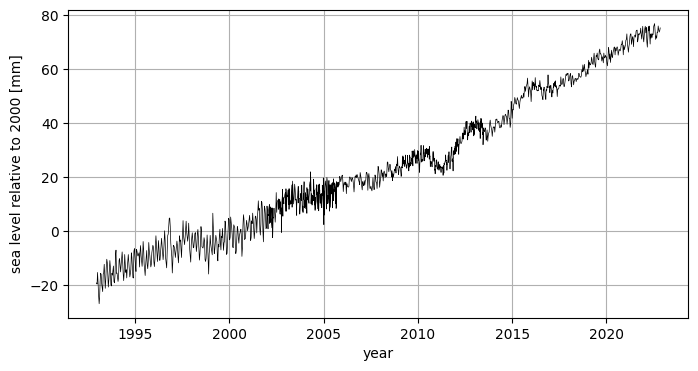

In [88]:
fig, ax = plt.subplots(figsize=(8, 4))

# plot the sea level column as a function of the year column
ax.plot(noaa["year"], noaa["max_level"], lw=0.5, color="black")

# set the axis labels
ax.set_xlabel("year")
ax.set_ylabel("sea level relative to 2000 [mm]")

# Add gridlines
ax.grid(True)

fig.show()

Let's compare this global value to values at smaller spatial scales.

<b>In the same way that you loaded the global data with seasonal effects removed, load in data for the Pacific Ocean, the Atlantic Ocean, the Indian Ocean, and the Southern Ocean (each in its own DataFrame), and for each of these new DataFrames, create a `"max_level"` column that is the max sea level for that region .</b>

In [89]:
pacific = pd.read_csv("https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/slr/slr_sla_pac_free_txj1j2_90.csv", skiprows=5)
atlantic = pd.read_csv("https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/slr/slr_sla_atl_free_txj1j2_90.csv", skiprows=5)
indian = pd.read_csv("https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/slr/slr_sla_ind_free_txj1j2_90.csv", skiprows=5)
southern = pd.read_csv("https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/slr/slr_sla_so_free_txj1j2.csv", skiprows=5)

def add_max_col(df_name):
  # Maimum value of the measurements for each time
  cols = ["TOPEX/Poseidon", "Jason-1", "Jason-2", "Jason-3"]
  max_level = df_name[cols].max(axis=1)

  # Add to the DataFrame
  df_name["max_level"] = max_level

add_max_col(pacific)
add_max_col(atlantic)
add_max_col(indian)
add_max_col(southern)

In [90]:
# # Check all DF
# print(pacific.head())
# print(atlantic.head())
# print(indian.head())
# print(southern.head())

<b>Plot all of the max sea level data in a different color on the same plot using linewidth 0.2.  Plot the global line last in black using a linewidth of 0.5.  Be sure to include a legend in the plot.</b>

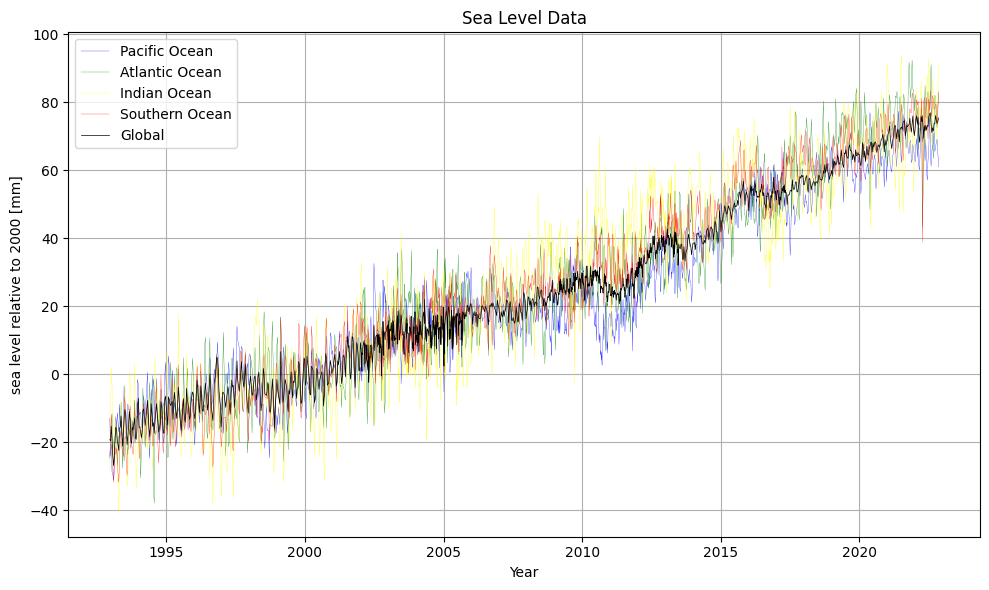

In [91]:
plt.figure(figsize=(10, 6))

# Plot max sea level data for different ocean regions
plt.plot(pacific['year'], pacific['max_level'], color='blue', label='Pacific Ocean', linewidth=0.2)
plt.plot(atlantic['year'], atlantic['max_level'], color='green', label='Atlantic Ocean', linewidth=0.2)
plt.plot(indian['year'], indian['max_level'], color='yellow', label='Indian Ocean', linewidth=0.2)
plt.plot(southern['year'], southern['max_level'], color='red', label='Southern Ocean', linewidth=0.2)

# Plot global max sea level data
plt.plot(noaa['year'], noaa['max_level'], color='black', label='Global', linewidth=0.5)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('sea level relative to 2000 [mm]')
plt.title('Sea Level Data')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


<b>Describe the plot above.  What can you conclude about the variability of sea level rise across the globe?</b>

The above plot looks very close to linear and follows upward trend. The sea level rises linearly across the globe. All the oceans' sea level follow linear and upward trend.

This data covers roughly 30 years of sea level changes, but there are data that go back further that are available from CSIRO (Commonwealth Scientific and Industrial Research Organization).  Descriptions of aggregated historical data from CSIRO can be found [here](https://research.csiro.au/slrwavescoast/sea-level/measurements-and-data/) and in the associated links.  The data we'll be using is available as a [CSV](https://datahub.io/core/sea-level-rise/r/epa-sea-level.csv) -- but please see the documentation and caveats associated with it in the README at the bottom of [this](https://datahub.io/core/sea-level-rise) page.

<b>Read in the CSIRO data from the link above labeled CSV (again, <u>without</u> downloading the data) into a DataFrame called `csiro` and take the <u>minimum</u> of the `"CSIRO Adjusted Sea Level"` and `"NOAA Adjusted Sea Level"` colmuns for each year and add those values to the `csiro` DataFrame as a column called `"min_level"`.</b>

In [92]:
fname = "https://datahub.io/core/sea-level-rise/r/epa-sea-level.csv"

csiro = pd.read_csv(fname)

csiro['min_level'] = csiro[['CSIRO Adjusted Sea Level', 'NOAA Adjusted Sea Level']].min(axis=1)

In [93]:
# # Check DF
# print(csiro.head())

Note that the year 2000 is in the 120th element of the CSIRO data and that the data is in inches, not millimeters.

<b>To get it in the same units as the NOAA data above, subtract off the value of `min_level` at the 120th element from `min_level`, then multiply the result by `2.54 * 10` (the inches to millimeters conversion), and put the result into a new column called `"adjusted_min_level"`.</b>

In [94]:
value_at_2000 = csiro.at[119, 'min_level']
multiplier = 2.54 * 10

csiro['adjusted_min_level'] = (csiro['min_level'] - value_at_2000) * multiplier

Run the cell below to create a column called "year_int" that is the CSIRO year so that we don't have to worry about the months and dates from now on.

In [95]:
csiro["year_int"] = [int(i[:4]) for i in csiro["Year"]]

<b>Now plot all of the data (all NOAA and CSIRO) on the same graph.</b>

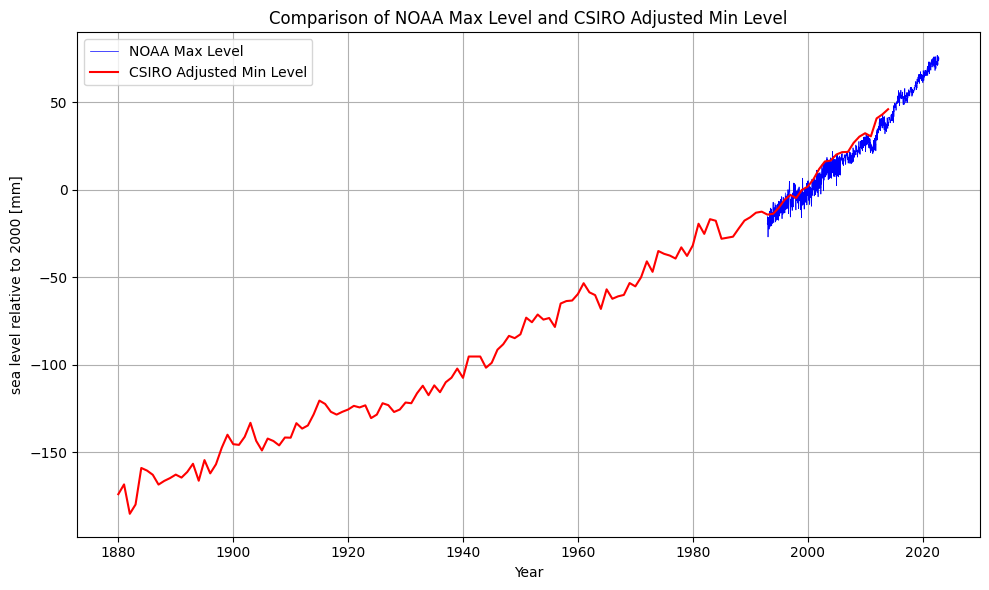

In [96]:
plt.figure(figsize=(10, 6))

# Plot NOAA data
plt.plot(noaa['year'], noaa['max_level'], color='blue', label='NOAA Max Level', linewidth=0.5)
# plt.plot(csiro['year_int'], csiro['NOAA Adjusted Sea Level'], color='blue', label='NOAA Adjusted Min Level', linewidth=0.5)


# Plot CSIRO data
plt.plot(csiro['year_int'], csiro['adjusted_min_level'], color='red', label='CSIRO Adjusted Min Level')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('sea level relative to 2000 [mm]')
plt.title('Comparison of NOAA Max Level and CSIRO Adjusted Min Level')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


### **PART 4 - Standardize the data**

You should now have two DataFrames, one holding the <u>global</u> NOAA data (we'll work with only the global data from now on) with columns called `"year"` and `"max_level"`, and one holding the CSIRO data with columns called `"year_int"` and `"adjusted_min_level"`.  As we did in class, we have to standardize this data for the SGD-based linear regression.

<b>Get the mean and standard deviation of `"year"` and `"max_level"` from the NOAA dataframe and the mean and standard deviation of the `"year_int"` and `"adjusted_min_level"` from the CSIRO dataframe.</b>

In [97]:
# Calculate mean and standard deviation for NOAA data
noaa_mean_year = noaa['year'].mean()
noaa_std_year = noaa['year'].std()
noaa_mean_max_level = noaa['max_level'].mean()
noaa_std_max_level = noaa['max_level'].std()

# Calculate mean and standard deviation for CSIRO data
csiro_mean_year_int = csiro['year_int'].mean()
csiro_std_year_int = csiro['year_int'].std()
csiro_mean_adjusted_min_level = csiro['adjusted_min_level'].mean()
csiro_std_adjusted_min_level = csiro['adjusted_min_level'].std()


<b>Create columns in your NOAA dataframe called `"year_st"` and `"max_level_st"` that are standardized versions of `"year"` and `"max_level"`.</b>

In [98]:
# Standardize "year" and "max_level" columns in the NOAA DataFrame
noaa['year_st'] = (noaa['year'] - noaa_mean_year) / noaa_std_year
noaa['max_level_st'] = (noaa['max_level'] - noaa_mean_max_level) / noaa_std_max_level

 <b>Create columns in your CSIRO dataframe called `"year_int_st"` and `"adjusted_min_level_st"` that are standardized versions of `"year_int"` and `"adjusted_min_level"`.</b>

In [99]:
# Standardize "year_int" and "adjusted_min_level" columns in the CSIRO DataFrame
csiro['year_int_st'] = (csiro['year_int'] - csiro_mean_year_int) / csiro_std_year_int
csiro['adjusted_min_level_st'] = (csiro['adjusted_min_level'] - csiro_mean_adjusted_min_level) / csiro_std_adjusted_min_level

<b>Make a plot of the standardized NOAA global data.</b>

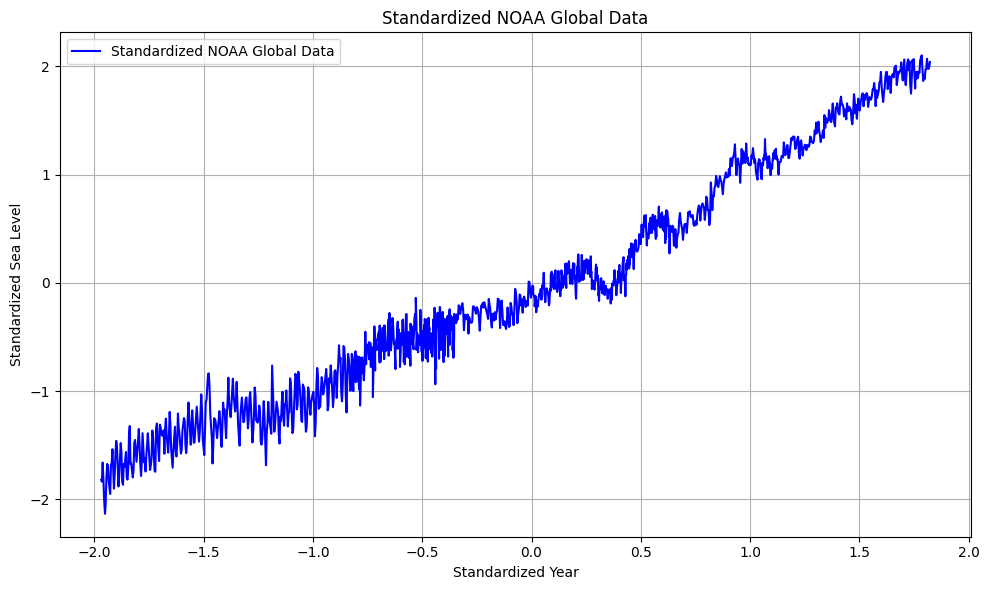

In [100]:
plt.figure(figsize=(10, 6))

# Plot standardized NOAA global data
plt.plot(noaa['year_st'], noaa['max_level_st'], color='blue', label='Standardized NOAA Global Data')

# Adding labels and title
plt.xlabel('Standardized Year')
plt.ylabel('Standardized Sea Level')
plt.title('Standardized NOAA Global Data')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


<b>Make a plot of the standardized CSIRO data.</b>

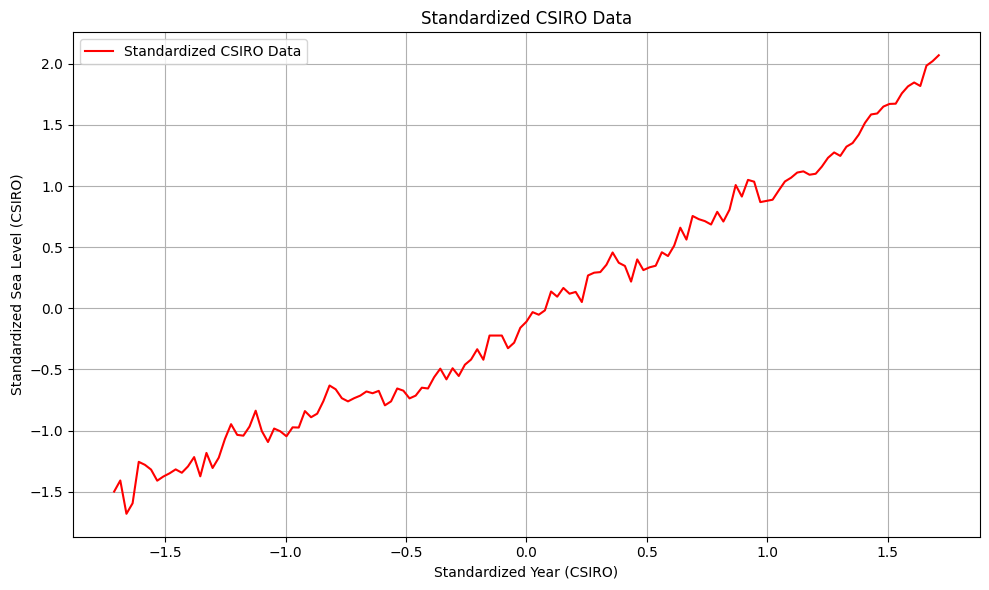

In [101]:
plt.figure(figsize=(10, 6))

# Plot standardized CSIRO data
plt.plot(csiro['year_int_st'], csiro['adjusted_min_level_st'], color='red', label='Standardized CSIRO Data')

# Adding labels and title
plt.xlabel('Standardized Year (CSIRO)')
plt.ylabel('Standardized Sea Level (CSIRO)')
plt.title('Standardized CSIRO Data')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


### **PART 5 - Fit and compare models between NOAA and CSIRO**

<b>Import `SGDRegressor` from `sklearn` and run a regression model on the NOAA global data using the default parameters.</b>

In [102]:
# Prepare the feature matrix X (year_st) and target vector y (max_level_st)
X = noaa[['year_st']]
y = noaa['max_level_st']

# Initialize SGDRegressor with default parameters
sgd_regressor = SGDRegressor()

# Fit the model
sgd_regressor.fit(X, y)

# Print the intercept and coefficient(s)
print("Intercept:", sgd_regressor.intercept_)
print("Coefficient(s):", sgd_regressor.coef_)

Intercept: [0.00246436]
Coefficient(s): [0.9831411]


<b>"Unstandardize" this model as we did in class by multiplying by the standard deviation and adding the average of the unstandardized data set.</b>

In [103]:
noaa['max_level_pred'] = sgd_regressor.predict(X) * noaa_std_max_level + noaa_mean_max_level

unstd_intercept = sgd_regressor.intercept_ * noaa_std_max_level + noaa_mean_max_level
unstd_coef = sgd_regressor.coef_ * noaa_std_max_level

# Print the unstandardized intercept and coefficient(s)
print("Unstandardized Intercept:", unstd_intercept)
print("Unstandardized Coefficient(s):", unstd_coef)

Unstandardized Intercept: [25.45589728]
Unstandardized Coefficient(s): [24.11490731]


<b>Calculate the Mean Squared Error (MSE) and $R^2$ for this model.</b>

In [104]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(noaa['max_level'], noaa['max_level_pred'])

# Calculate R^2
r2 = r2_score(noaa['max_level'], noaa['max_level_pred'])

# Print MSE and R^2
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)


Mean Squared Error (MSE): 21.890497940512077
R^2 Score: 0.9635886298255701


<b>Overplot this model on the global NOAA data using `plotly.express`.</b>

In [105]:
# Plotting using Plotly Express
fig = px.scatter(x=noaa['year'], y=noaa['max_level'], trendline_color_override="blue",
                 labels={'x': 'Year', 'y': 'sea level relative to 2000 [mm]'}, title='Global NOAA Data with Linear Regression Model')

# Add predicted values
fig.add_scatter(x=noaa['year'], y=noaa['max_level_pred'], mode='lines', name='Linear Regression Model', line=dict(color='red'))

# Show plot
fig.show()


<b>Fit an SGDRegressor model to the standardized CSIRO data, "un-standardize" the model, and calculate the MSE and $R^2$ for this model.</b>

In [126]:
sgd_regressor_csiro = SGDRegressor()

X_csiro = csiro[['year_int_st']]
y_csiro = csiro['adjusted_min_level_st']

# Fit the model
sgd_regressor_csiro.fit(X_csiro, y_csiro)

# # Unstandardize the coefficients
# unstd_intercept_csiro = sgd_regressor_csiro.intercept_ * csiro_std_adjusted_min_level + csiro_mean_adjusted_min_level
# unstd_coef_csiro = sgd_regressor_csiro.coef_ * csiro_std_adjusted_min_level

# # Print the unstandardized intercept and coefficient(s)
# print("Unstandardized Intercept:", unstd_intercept_csiro)
# print("Unstandardized Coefficient(s):", unstd_coef_csiro)

# Predict the target variable using the trained model
csiro_pred_std = sgd_regressor_csiro.predict(X_csiro)

csiro_pred = csiro_pred_std * csiro_std_adjusted_min_level + csiro_mean_adjusted_min_level

# Calculate Mean Squared Error (MSE) and R^2
mse_csiro = mean_squared_error(csiro[['adjusted_min_level']], csiro_pred)
r2_csiro = r2_score(csiro[['adjusted_min_level']], csiro_pred)

# Print MSE and R^2
print("Mean Squared Error (MSE) for CSIRO data:", mse_csiro)
print("R^2 Score for CSIRO data:", r2_csiro)


Mean Squared Error (MSE) for CSIRO data: 82.59220847030477
R^2 Score for CSIRO data: 0.9781165411596027


<b>Overplot this model on the CSIRO data using `plotly.express`.</b>

In [127]:
# Predict the target variable using the trained model
csiro['adjusted_min_level_pred'] = csiro_pred

# Plotting using Plotly Express
fig = px.scatter(x=csiro['year_int'], y=csiro['adjusted_min_level'], trendline_color_override="blue",
                 labels={'x': 'Year', 'y': 'sea level relative to 2000 [mm]'}, title='CSIRO Data with Linear Regression Model')

# Add predicted values
fig.add_scatter(x=csiro['year_int'], y=csiro_pred, mode='lines', name='Linear Regression Model', line=dict(color='red'))

# Show plot
fig.show()


<b>

Comment on the above plots by answering the following questions:  

1. Which data is better fit by a linear model and why do you think that is?
2. What are the rates of sea level rise for each model?
3. What are the predictions for each model for sea level in 2100?
4. What approximations have we made that may or may not be accurate?
5. How do your findings relate and compare to the information in the resources you identified in Part 1 above?

</b>

1. CSIRO data is better fit by a Linear Model. I think so because the model has better R-Square value and model fit is very closer to actual values in the plot.
2. The rates of sea level for NOAA is 3.0mm/year  and for CSIRO is 1.53mm/year.
3. The predictions for sea level in 2100 is 172.6758mm for CSIRO and 299mm for NOAA.
4. The model is approximated as Linear but there will be slight variations and the model is assumed seal level without any seasonal effects.
5. As findings suggest that sea level rises and the model concludes the same as findings in 1.

In [131]:
print(sgd_regressor.coef_ * noaa_std_year + noaa_mean_year)
print(sgd_regressor.coef_)

[2016.23311323]
[0.9831411]


### **PART 6 - EXTRA CREDIT**

<b>Perform a linear regression on each 30 year interval in the CSIRO data starting from 1880 (i.e, 1880-1910, 1881-1911, 1882-1912, etc).  Make a plot of the slope that is fit for each interval as a function of time.  What are the implications of this plot?</b>


<ipython-input-132-440e51db2d78>:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-132-440e51db2d78>:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-132-440e51db2d78>:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-132-440e51db2d78>:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-132-440e51db2d78>:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-132-440e51db2d78>:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future versi

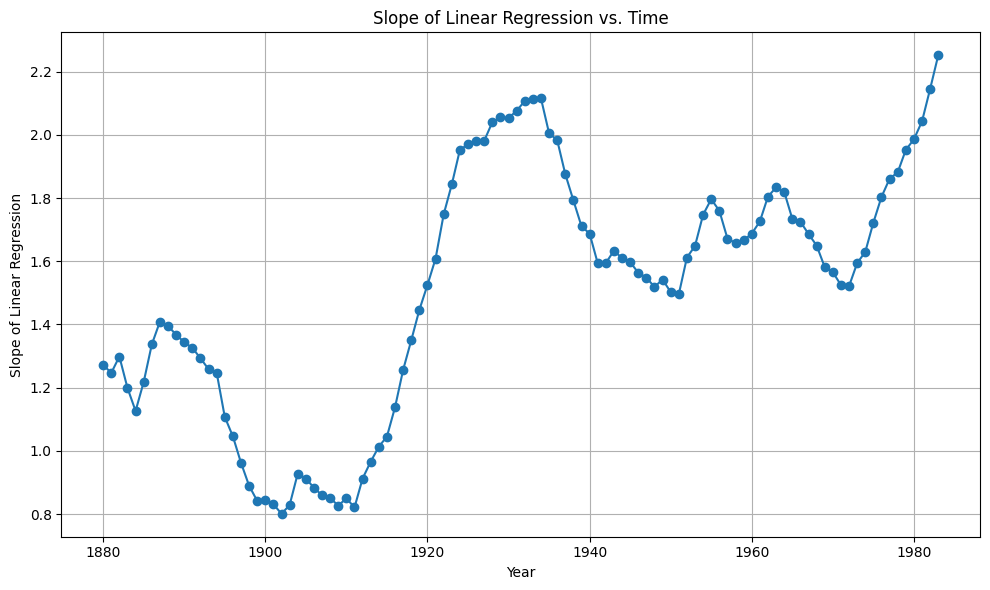

In [132]:
def perform_regression(interval_df):
    X = interval_df[['year_int']].values.reshape(-1, 1)
    y = interval_df['adjusted_min_level'].values.reshape(-1, 1)
    model = LinearRegression()
    model.fit(X, y)
    return model.coef_[0][0]  # Return the slope coefficient

slopes_df = pd.DataFrame(columns=['Year', 'Slope'])

for start_year in range(1880, 1984):
    end_year = start_year + 30
    interval_df = csiro[(csiro['year_int'] >= start_year) & (csiro['year_int'] < end_year)]
    slope = perform_regression(interval_df)
    slopes_df = slopes_df.append({'Year': start_year, 'Slope': slope}, ignore_index=True)

# Plot the slopes as a function of time
plt.figure(figsize=(10, 6))
plt.plot(slopes_df['Year'], slopes_df['Slope'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Slope of Linear Regression')
plt.title('Slope of Linear Regression vs. Time')
plt.grid(True)
plt.tight_layout()
plt.show()


Slope is constant with time. As slope is constant on Linear model but in contrast the slope is varying while we considering 30 years period. This may be due to:
Choosing Linear Regression(not SGD) or we can assume that the model is volatile to Extreme values since we have less observations(30).